In [113]:
#Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display
pd.options.display.max_columns = None
import stylecloud
import stop_words
import nltk
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
import re
nltk.download('stopwords')


#Seteamos gráficos 
plt.style.use('dark_background')
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Inhabilitamos advertencias 
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rodolfopardo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodolfopardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#Importamos la data

data = pd.read_csv('GUA-8211-Pert-VFinal-Unificado.csv')

In [23]:
#Conociendo nuestra base 

print('Tenemos {} filas con {} variables para analizar en este dataset'.format(data.shape[0], data.shape[1]))

Tenemos 756 filas con 67 variables para analizar en este dataset


In [24]:
#Conociendo los primeros datos

data.head()

,1-Edad,2- Que nivel socioeconómico hay en el area que usted vive?,Cocina,Belleza,Tutoriales,Casa y jardín,Juegos online,Deportes y ejercicio,Salud y bienestar,Tecnología,Viajes,Mascotas,Aire libre,Noticias,Redes sociales,Promociones online,TV y películas,Familia,Música,4- En cual de estas regiones usted vive?,5- Donde compra habitualmente su shampoo y acondicionador?,Shampoo,Acondicionador,Crema de Peinar,"Tratamientos Intensivos (Mascarillas, Cremas, Ampollas, Aceites, etc)",7- Que formatos de shampoo/acondicionador/tratamientos usted utiliza?,8- Al momento de comprar su Shampoo o Acondicionador. Cual de las siguientes afirmaciones mas describen su actitud?,9- Cual de las siguientes afirmaciones mejor describen su tipo de compra al momento de cambiar de marca?,10- Cuando usted elige un Shampoo o Acondicionador. Cuales son los dos atributos mas importantes?,Por favor elija otro atributo sin repetir,Pert,Savile,Palmolive,Sedal,Pantene,Herbal Essences,Calypso,Head & Shoulders,Fructis de Garnier,Elvive de Loreal,Dove,Tresemme,Organix,John Frieda,12- Que marca de shampoo/acondicionador usted utiliza más frecuentemente?,13- Si se le menciona a la marca de Shampoo y Acondicionador Pert. Que se le viene a la cabeza? Describa en sus propias palabras.,14- Que opinion tiene para esta idea para la marca de Shampoo/Acondionador Pert?,Que opinion tiene para esta idea para la marca de Shampoo/Acondionador Pert?,15- Cual es su intencion de compra para esta marca de Shampoo/Acondicionador Pert? Shampoo 650 ml Q 35.00. Acondicionador 340 ml Q 20.00,16- Cual es su opinion respecto del precio de venta recomendado para Pert? Shampoo 650 ml Q 35.00. Acondicionador 340 ml Q 20.00,"17- Después de ver esta idea, como la compara contra la marca que usted utiliza más frecuentemente?",Es moderna,Productos de alta calidad,Es una marca para mi,Precio accessible,Cuidado del cabello,19- Que opinión tiene de la marca Palmolive Shampoo/Acondicionador?,20- Que interés de compra usted tiene para la marca Palmolive Shampoo/Acondicionador?,Es moderna.1,Productos de alta calidad.1,Es una marca para mi.1,Precio accessible.1,Cuidado del cabello.1,Email,Télefono Celular,Nombre,Terminos y condiciones.
0,40-50,Medio Bajo,2,3,1,3,5,5,1,3,1,1,2,1,3,1,1,3,2,Sur Occidente,Mini Supermercado,A diario,A diario,A diario,Dia por medio,Botella,Tiendo a variar de marca de vez en cuando,Cambio porque me gusta probar nuevos productos,Hidratación / Nutricion,Control del Frizz,SI,NO,NO,SI,SI,SI,NO,NO,SI,SI,SI,SI,NO,NO,Pert,"Deja el cabello con Brillo, suavidad, agradabl...",NaN,Me gusta mucho,"Si, definitivamente la compraría",3. Adecuado,Es Igual,5. Muy Buena,5. Muy Buena,5. Muy Buena,4. Buena,5. Muy Buena,No me gusta nada,"No, definitivamente no la compraría",1. Muy Mala,2. Mala,2. Mala,3. Adecuada,2. Mala,claudialp.mf@gmail.com,5.025018e+10,Claudia Lorena Padilla Rodriguez,Acepto los términos y condiciones
1,40-50,Bajo,3,3,3,3,3,2,3,3,2,3,3,3,3,3,4,4,3,Metro,Supermercado / Hipermercado,A diario,A diario,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Limpieza profunda,Brillo,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,Palmolive,Precio y calidad,-,Me es indiferente,"Si, definitivamente la compraría",3. Adecuado,Es mejor,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,Me gusta,"Si, definitivamente la compraría",4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,wendy.ixcot80@gmail.com,5.023130e+10,Wendy ixcot Reyna,Acepto los términos y condiciones
2,40-50,Medio Alto,4,3,4,3,2,3,4,5,2,4,3,2,2,4,3,4,4,Metro,Supermercado / Hipermercado,Dia por medio,Dia por medio,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Marca conocida y de alta calidad,Hidratación / Nutricion,SI,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,NO,NO,Dove,Plus,-,Me es indiferente,Podría considerarlo comprarla,3. Adecuado,Es Igual,3. Adecuada,3. Adecuada,3. Adecuada,2. Mala,3. Adecuada,Me gusta,Podría considerarlo compra

In [25]:
#Conociendo las columnas

data.columns

Index(['1-Edad', '2- Que nivel socioeconómico hay en el area que usted vive?',
       'Cocina', 'Belleza', 'Tutoriales', 'Casa y jardín', 'Juegos online',
       'Deportes y ejercicio', 'Salud y bienestar', 'Tecnología', 'Viajes',
       'Mascotas', 'Aire libre', 'Noticias', 'Redes sociales',
       'Promociones online', 'TV y películas', 'Familia', 'Música',
       '4- En cual de estas regiones usted vive?',
       '5- Donde compra habitualmente su shampoo y acondicionador?', 'Shampoo',
       'Acondicionador', 'Crema de Peinar',
       'Tratamientos Intensivos (Mascarillas, Cremas, Ampollas, Aceites, etc)',
       '7- Que formatos de shampoo/acondicionador/tratamientos usted utiliza?',
       '8- Al momento de comprar su Shampoo o Acondicionador. Cual de las siguientes afirmaciones mas describen su actitud?',
       '9- Cual de las siguientes afirmaciones mejor describen su tipo de compra al momento de cambiar de marca?',
       '10- Cuando usted elige un Shampoo o Acondicionador. Cu

In [26]:
#Nomenclando nuevamente las columnas 

columnas = ['rango_etario', 'nivel_socioeconomico', 'cocina', 'belleza', 'tutoriales', 'casa_jardin', 'juegos_online',
           'deportes', 'salud_bienestar', 'tecnologia', 'viajes', 'mascotas', 'aire_libre', 'noticias', 'redes_sociales',
           'promo_online', 'tv_pelis', 'familia', 'musica', 'region', 'lugar_compra_shampoo', 'shampoo', 'acondicionador',
           'crema_peinar', 'tratamientos', 'formatos_shampoo', 'afirmaciones_actitud', 'afirmaciones_compra',
           'eleccion_shampoo_atributos', 'elija_atributo','pert', 'savile', 'palmolive', 'sedal', 'pantene', 'herbal_essences', 'calypso',
           'head_shoulders', 'fructis_de_garnier', 'elvive', 'dove', 'treseme', 'organix', 'johnfrieda', 'marca_shampoo',
           'marca_shampoo_pert', 'opinion_pert', 'opinion_pert2', 'intencion_compra', 'opinion_precio_venta', 'compara_marca',
           'es_moderna', 'productos_de_calidad', 'marca_para_mi', 'precio_accesible', 'cuidado_cabello', 'opinion_palmolive',
           'interes_compra_palmolive', 'es_moderna', 'alta_calidad', 'marca_para_mi2', 'precio_accesible2', 'cuidado_cabello2', 
           'email', 'celular', 'nombre', 'condiciones_y_terminos']

In [27]:
#Renombrando columnas

data.columns = columnas

In [28]:
#Primeros valores

data.head()

,rango_etario,nivel_socioeconomico,cocina,belleza,tutoriales,casa_jardin,juegos_online,deportes,salud_bienestar,tecnologia,viajes,mascotas,aire_libre,noticias,redes_sociales,promo_online,tv_pelis,familia,musica,region,lugar_compra_shampoo,shampoo,acondicionador,crema_peinar,tratamientos,formatos_shampoo,afirmaciones_actitud,afirmaciones_compra,eleccion_shampoo_atributos,elija_atributo,pert,savile,palmolive,sedal,pantene,herbal_essences,calypso,head_shoulders,fructis_de_garnier,elvive,dove,treseme,organix,johnfrieda,marca_shampoo,marca_shampoo_pert,opinion_pert,opinion_pert2,intencion_compra,opinion_precio_venta,compara_marca,es_moderna,productos_de_calidad,marca_para_mi,precio_accesible,cuidado_cabello,opinion_palmolive,interes_compra_palmolive,es_moderna,alta_calidad,marca_para_mi2,precio_accesible2,cuidado_cabello2,email,celular,nombre,condiciones_y_terminos
0,40-50,Medio Bajo,2,3,1,3,5,5,1,3,1,1,2,1,3,1,1,3,2,Sur Occidente,Mini Supermercado,A diario,A diario,A diario,Dia por medio,Botella,Tiendo a variar de marca de vez en cuando,Cambio porque me gusta probar nuevos productos,Hidratación / Nutricion,Control del Frizz,SI,NO,NO,SI,SI,SI,NO,NO,SI,SI,SI,SI,NO,NO,Pert,"Deja el cabello con Brillo, suavidad, agradabl...",NaN,Me gusta mucho,"Si, definitivamente la compraría",3. Adecuado,Es Igual,5. Muy Buena,5. Muy Buena,5. Muy Buena,4. Buena,5. Muy Buena,No me gusta nada,"No, definitivamente no la compraría",1. Muy Mala,2. Mala,2. Mala,3. Adecuada,2. Mala,claudialp.mf@gmail.com,5.025018e+10,Claudia Lorena Padilla Rodriguez,Acepto los términos y condiciones
1,40-50,Bajo,3,3,3,3,3,2,3,3,2,3,3,3,3,3,4,4,3,Metro,Supermercado / Hipermercado,A diario,A diario,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Limpieza profunda,Brillo,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,Palmolive,Precio y calidad,-,Me es indiferente,"Si, definitivamente la compraría",3. Adecuado,Es mejor,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,Me gusta,"Si, definitivamente la compraría",4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,wendy.ixcot80@gmail.com,5.023130e+10,Wendy ixcot Reyna,Acepto los términos y condiciones
2,40-50,Medio Alto,4,3,4,3,2,3,4,5,2,4,3,2,2,4,3,4,4,Metro,Supermercado / Hipermercado,Dia por medio,Dia por medio,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Marca conocida y de alta calidad,Hidratación / Nutricion,SI,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,NO,NO,Dove,Plus,-,Me es indiferente,Podría considerarlo comprarla,3. Adecuado,Es Igual,3. Adecuada,3. Adecuada,3. Adecuada,2. Mala,3. Adecuada,Me gusta,Podría considerarlo comprarla,3. Adecuada,3. Adecuada,3. Adecuada,2. Mala,3. Adecuada,aurora.zeamendez@gmail.com,NaN,Aurora Zea de Gutiérrez,Acepto los términos y condiciones
3,30-40,Medio,1,2,5,4,1,2,4,3,1,5,3,2,2,2,4,4,4,Sur Oriente,Supermercado / Hipermercado,A diario,A diario,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Hidratación / Nutricion,Control del Frizz,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,Otras,Frescura,-,Me gusta,"Si, definitivamente la compraría",2. Barato,Es mejor,4. Buena,5. Muy Buena,3. Adecuada,4. Buena,4. Buena,No me gusta,Podría considerarlo comprarla,4. Buena,3. Adecuada,3. Adecuada,4. Buena,4. Buena,diaze3344@gmail.com,5.023033e+10,Sarita Diaz,Acepto los términos y condiciones
4,40-50,Medio Bajo,3,3,4,4,2,3,3,3,4,3,3,3,4,3,4,4,4,Metro,Tienda Mayorista,A diario,Dia por medio,A diario,Algunas veces por mes,Sachets / Cojines,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Marca conocida y de alta calidad,De uso familiar,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO,NO,Pantene,Frescura y brillo,NaN,Me gusta mucho,Podría considerarlo comprarla,3. Adecuado,Es mejor,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,Me es indiferente,Podría considerarlo comprarla,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,mayramorataya79@gmail.com,5.024180

In [30]:
#Encontrando valores nulos 

null_counts = data.isnull().sum()
null_counts[null_counts > 0]

marca_shampoo_pert      1
opinion_pert          333
celular                69
dtype: int64

In [32]:
#Encontrando valores duplicados 

data.duplicated(keep = False).sum()

0

In [188]:
#Estadistica descr

data.describe()

,cocina,belleza,tutoriales,casa_jardin,juegos_online,deportes,salud_bienestar,tecnologia,viajes,mascotas,aire_libre,noticias,redes_sociales,promo_online,tv_pelis,familia,musica,celular
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,6.870000e+02
mean,4.133598,3.906085,3.857143,3.584656,2.481481,3.466931,4.166667,3.834656,3.275132,3.443122,3.838624,3.595238,3.931217,3.743386,3.850529,4.387566,4.107143,5.024716e+10
std,1.091512,1.161372,1.187446,1.201314,1.368879,1.248137,1.026148,1.152212,1.407065,1.452358,1.201716,1.252358,1.129041,1.260830,1.226695,0.969360,1.133664,8.970314e+06
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.022243e+10
25%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.024104e+10
50%,5.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.024788e+10
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.025514e+10
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.025996e+10


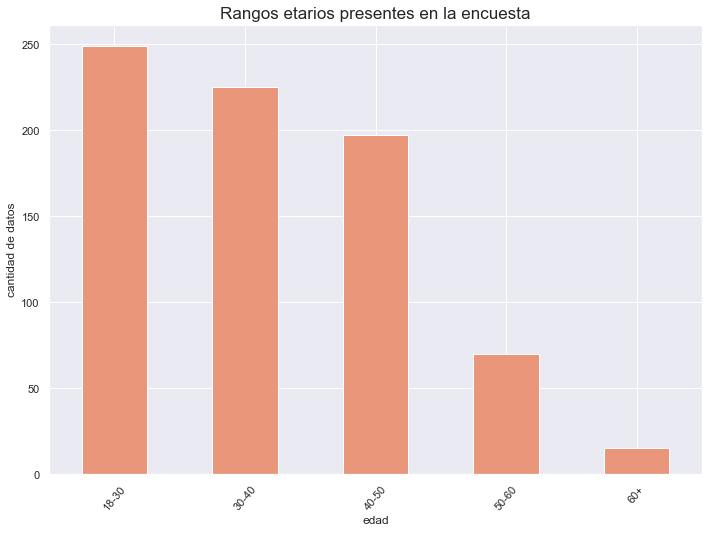

In [48]:
#Visualizando rangos etarios BAR PLOT 

data['rango_etario'].value_counts().plot.bar(rot = 50, color = "#E9967A")
plt.title('Rangos etarios presentes en la encuesta', fontsize = 17)
plt.xlabel('edad')
plt.ylabel('cantidad de datos')
plt.show()

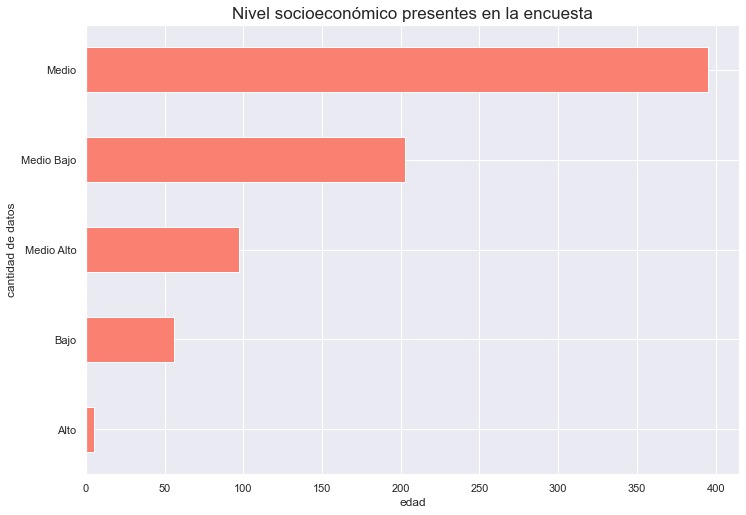

In [47]:
#Visualizando barplot horizontal

data['nivel_socioeconomico'].value_counts().sort_values().plot.barh(rot = 0, color = "#FA8072")
plt.title('Nivel socioeconómico presentes en la encuesta', fontsize = 17)
plt.xlabel('edad')
plt.ylabel('cantidad de datos')
plt.show()

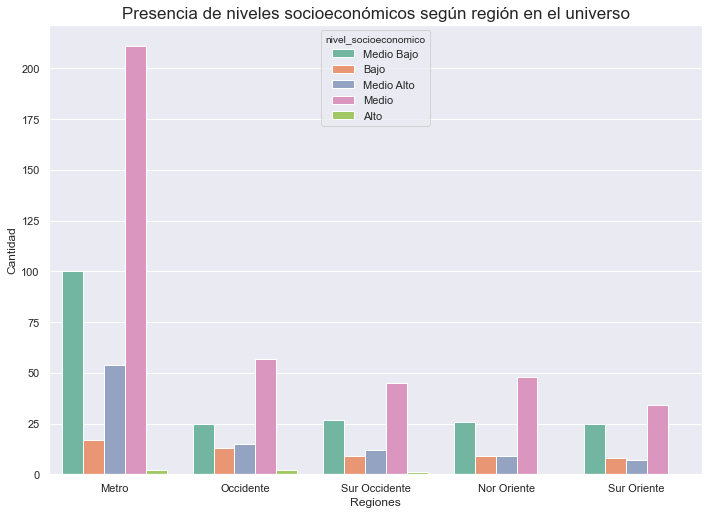

In [66]:
sns.countplot(x = 'region', 
              data = data,
             order = data['region'].value_counts().index,
             hue = 'nivel_socioeconomico',
             palette = "Set2")
plt.title('Presencia de niveles socioeconómicos según región en el universo', fontsize = 17)
plt.xlabel('Regiones')
plt.ylabel('Cantidad')
plt.show()

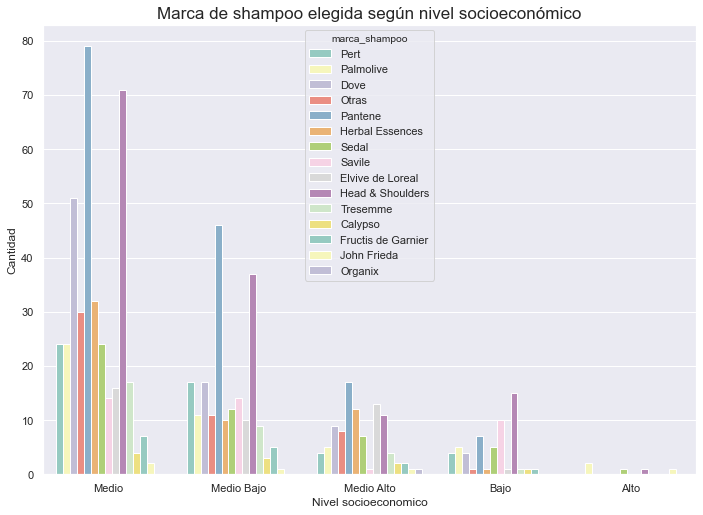

In [176]:
sns.countplot(x = 'nivel_socioeconomico', 
              data = data,
             order = data['nivel_socioeconomico'].value_counts().index,
             hue = 'marca_shampoo',
             palette = "Set3")
plt.title('Marca de shampoo elegida según nivel socioeconómico', fontsize = 17)
plt.xlabel('Nivel socioeconomico')
plt.ylabel('Cantidad')
plt.show()

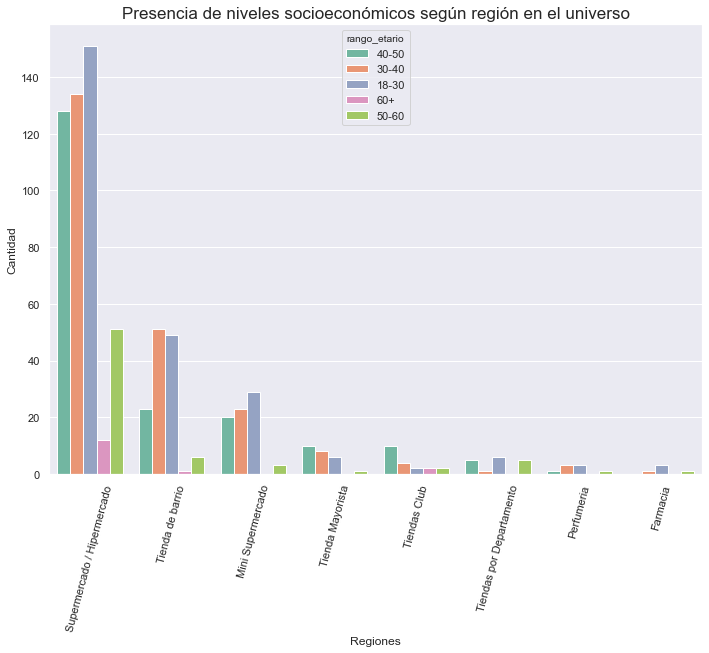

In [70]:
sns.countplot(x = 'lugar_compra_shampoo', 
              data = data,
             order = data['lugar_compra_shampoo'].value_counts().index,
             hue = 'rango_etario',
             palette = "Set2")
plt.title('Presencia de niveles socioeconómicos según región en el universo', fontsize = 17)
plt.xlabel('Regiones')
plt.xticks(rotation=75)
plt.ylabel('Cantidad')
plt.show()

In [71]:
data.head()

,rango_etario,nivel_socioeconomico,cocina,belleza,tutoriales,casa_jardin,juegos_online,deportes,salud_bienestar,tecnologia,viajes,mascotas,aire_libre,noticias,redes_sociales,promo_online,tv_pelis,familia,musica,region,lugar_compra_shampoo,shampoo,acondicionador,crema_peinar,tratamientos,formatos_shampoo,afirmaciones_actitud,afirmaciones_compra,eleccion_shampoo_atributos,elija_atributo,pert,savile,palmolive,sedal,pantene,herbal_essences,calypso,head_shoulders,fructis_de_garnier,elvive,dove,treseme,organix,johnfrieda,marca_shampoo,marca_shampoo_pert,opinion_pert,opinion_pert2,intencion_compra,opinion_precio_venta,compara_marca,es_moderna,productos_de_calidad,marca_para_mi,precio_accesible,cuidado_cabello,opinion_palmolive,interes_compra_palmolive,es_moderna,alta_calidad,marca_para_mi2,precio_accesible2,cuidado_cabello2,email,celular,nombre,condiciones_y_terminos
0,40-50,Medio Bajo,2,3,1,3,5,5,1,3,1,1,2,1,3,1,1,3,2,Sur Occidente,Mini Supermercado,A diario,A diario,A diario,Dia por medio,Botella,Tiendo a variar de marca de vez en cuando,Cambio porque me gusta probar nuevos productos,Hidratación / Nutricion,Control del Frizz,SI,NO,NO,SI,SI,SI,NO,NO,SI,SI,SI,SI,NO,NO,Pert,"Deja el cabello con Brillo, suavidad, agradabl...",NaN,Me gusta mucho,"Si, definitivamente la compraría",3. Adecuado,Es Igual,5. Muy Buena,5. Muy Buena,5. Muy Buena,4. Buena,5. Muy Buena,No me gusta nada,"No, definitivamente no la compraría",1. Muy Mala,2. Mala,2. Mala,3. Adecuada,2. Mala,claudialp.mf@gmail.com,5.025018e+10,Claudia Lorena Padilla Rodriguez,Acepto los términos y condiciones
1,40-50,Bajo,3,3,3,3,3,2,3,3,2,3,3,3,3,3,4,4,3,Metro,Supermercado / Hipermercado,A diario,A diario,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Limpieza profunda,Brillo,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,Palmolive,Precio y calidad,-,Me es indiferente,"Si, definitivamente la compraría",3. Adecuado,Es mejor,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,Me gusta,"Si, definitivamente la compraría",4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,wendy.ixcot80@gmail.com,5.023130e+10,Wendy ixcot Reyna,Acepto los términos y condiciones
2,40-50,Medio Alto,4,3,4,3,2,3,4,5,2,4,3,2,2,4,3,4,4,Metro,Supermercado / Hipermercado,Dia por medio,Dia por medio,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Marca conocida y de alta calidad,Hidratación / Nutricion,SI,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,NO,NO,Dove,Plus,-,Me es indiferente,Podría considerarlo comprarla,3. Adecuado,Es Igual,3. Adecuada,3. Adecuada,3. Adecuada,2. Mala,3. Adecuada,Me gusta,Podría considerarlo comprarla,3. Adecuada,3. Adecuada,3. Adecuada,2. Mala,3. Adecuada,aurora.zeamendez@gmail.com,NaN,Aurora Zea de Gutiérrez,Acepto los términos y condiciones
3,30-40,Medio,1,2,5,4,1,2,4,3,1,5,3,2,2,2,4,4,4,Sur Oriente,Supermercado / Hipermercado,A diario,A diario,A diario,Algunas veces por mes,Botella,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Hidratación / Nutricion,Control del Frizz,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,Otras,Frescura,-,Me gusta,"Si, definitivamente la compraría",2. Barato,Es mejor,4. Buena,5. Muy Buena,3. Adecuada,4. Buena,4. Buena,No me gusta,Podría considerarlo comprarla,4. Buena,3. Adecuada,3. Adecuada,4. Buena,4. Buena,diaze3344@gmail.com,5.023033e+10,Sarita Diaz,Acepto los términos y condiciones
4,40-50,Medio Bajo,3,3,4,4,2,3,3,3,4,3,3,3,4,3,4,4,4,Metro,Tienda Mayorista,A diario,Dia por medio,A diario,Algunas veces por mes,Sachets / Cojines,Tiendo a comprar la misma marca,Busco calidad similar a menor precio,Marca conocida y de alta calidad,De uso familiar,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO,NO,Pantene,Frescura y brillo,NaN,Me gusta mucho,Podría considerarlo comprarla,3. Adecuado,Es mejor,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,Me es indiferente,Podría considerarlo comprarla,4. Buena,4. Buena,4. Buena,4. Buena,4. Buena,mayramorataya79@gmail.com,5.024180

In [72]:
nueva_data = data[['rango_etario', 'nivel_socioeconomico', 'cocina', 'belleza', 'tutoriales', 'casa_jardin',
                  'juegos_online', 'deportes', 'salud_bienestar', 'tecnologia', 'viajes', 'mascotas', 'aire_libre']]

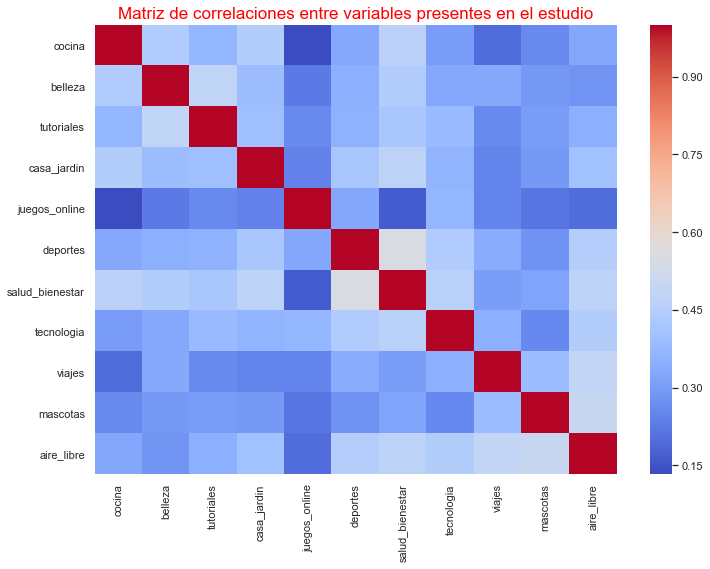

In [79]:
sns.heatmap(nueva_data.corr(),cmap='coolwarm')
plt.title('Matriz de correlaciones entre variables presentes en el estudio', fontsize = 17, color = "red")
plt.show()

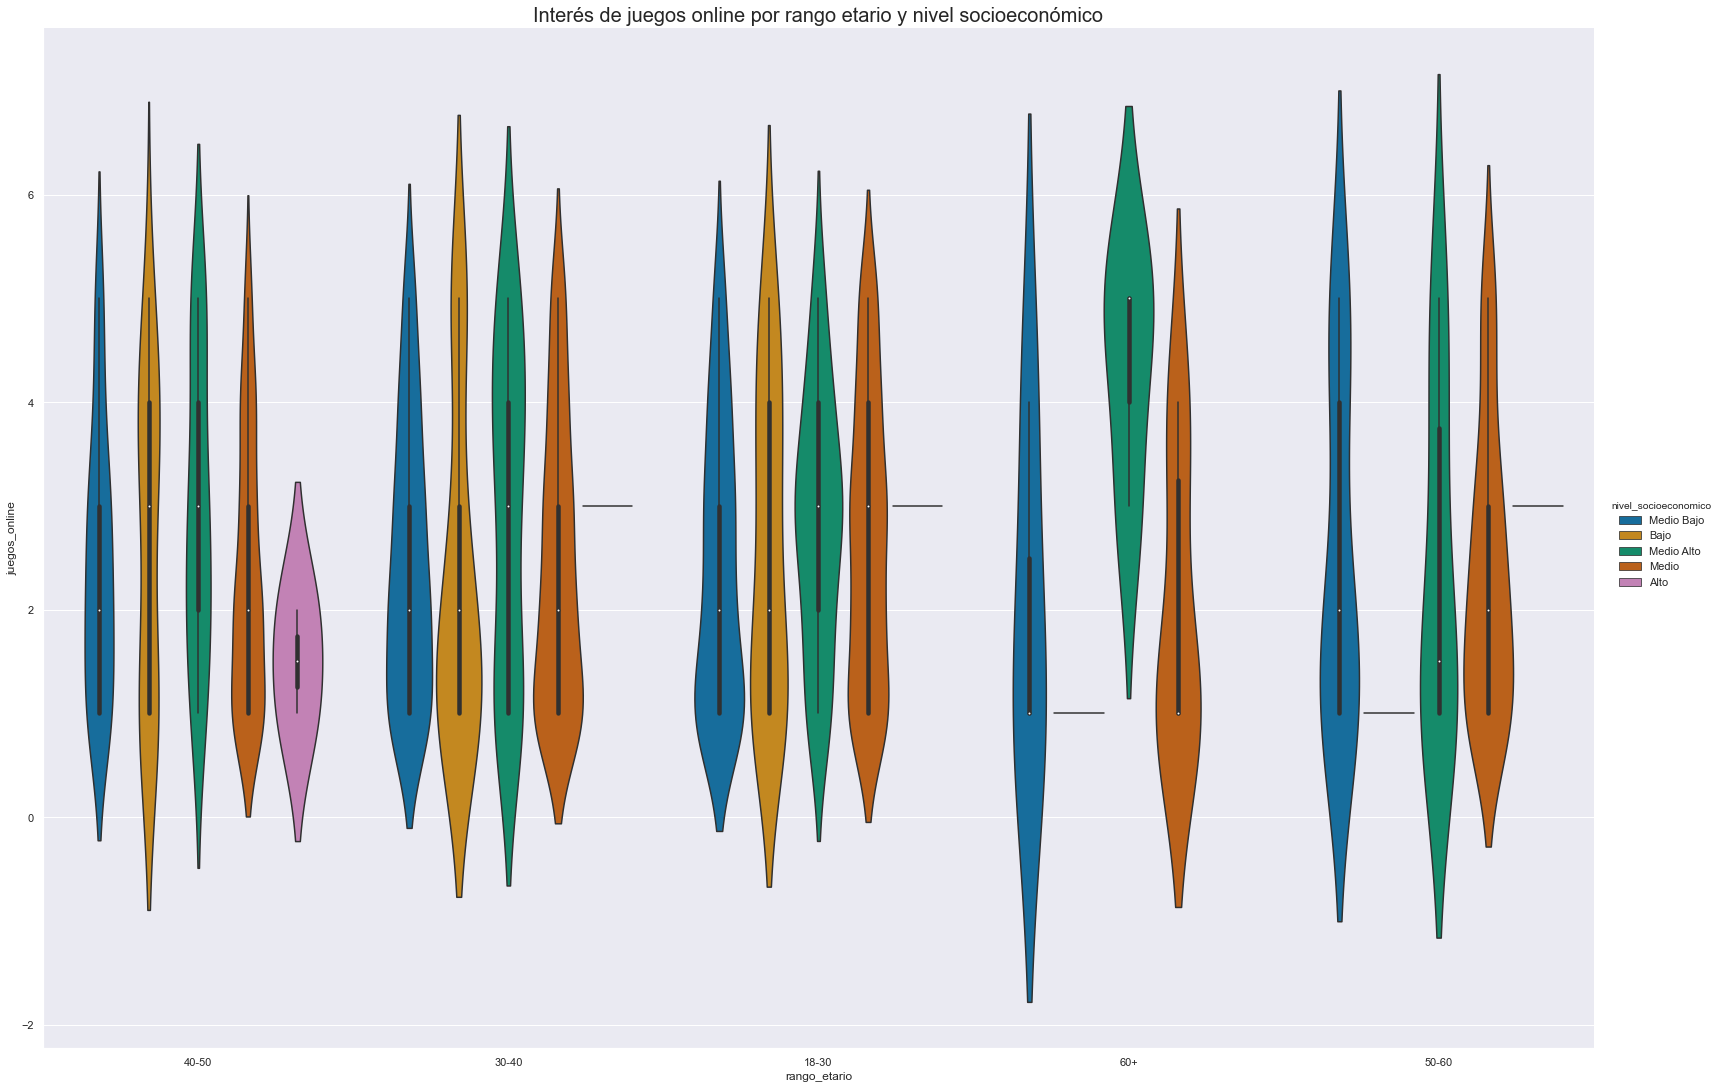

In [181]:
sns.factorplot(x = 'rango_etario',
              y = "juegos_online", 
              hue = "nivel_socioeconomico",
              data = nueva_data,
              kind = "violin",
              size = 15,
              aspect = 1.5,
              palette = "colorblind")
plt.title('Interés de juegos online por rango etario y nivel socioeconómico', fontsize = 20)
plt.show()

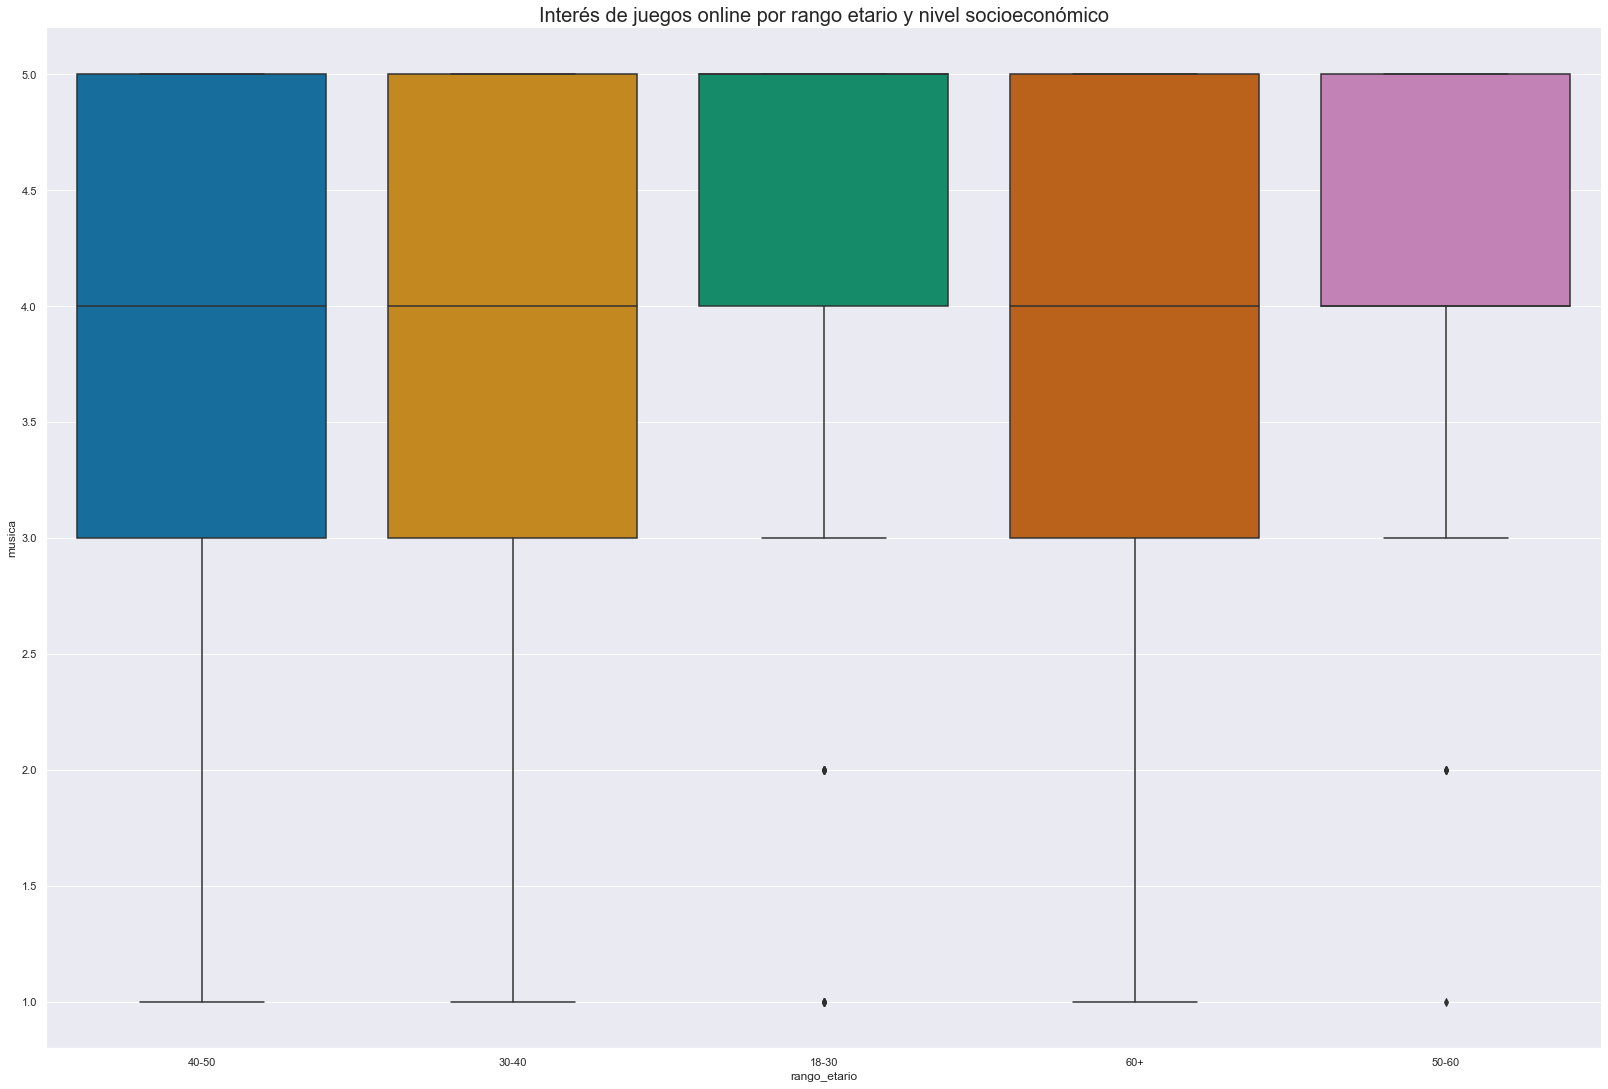

In [187]:
sns.factorplot(x = 'rango_etario',
              y = "musica", 
              #hue = "nivel_socioeconomico",
              data = data,
              kind = "box",
              size = 15,
              aspect = 1.5,
              palette = "colorblind")
plt.title('Interés de juegos online por rango etario y nivel socioeconómico', fontsize = 20)
plt.show()

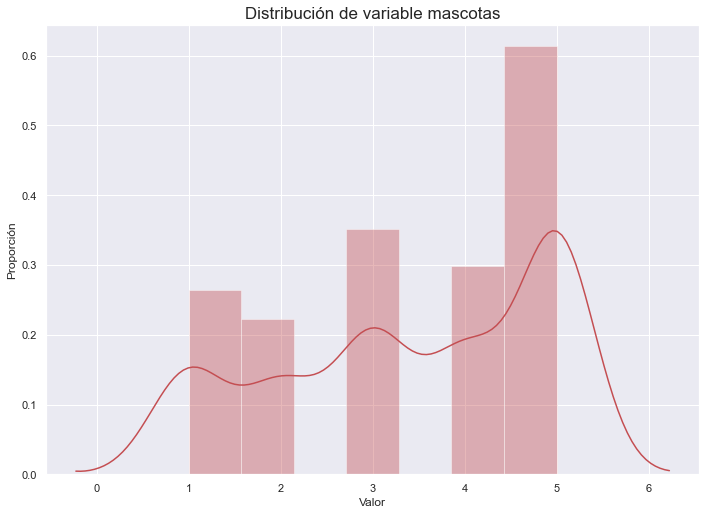

In [107]:
sns.distplot(data['mascotas'], hist = True, color = "r")
plt.title('Distribución de variable mascotas', fontsize = 17)
plt.xlabel('Valor')
plt.ylabel('Proporción')
plt.show()

In [150]:
data['opinion_pert2'].value_counts()

Me gusta             375
Me es indiferente    175
Me gusta mucho       168
No me gusta           20
No me gusta nada      18
Name: opinion_pert2, dtype: int64

In [151]:
data['opinion_pert'].value_counts()

-    423
Name: opinion_pert, dtype: int64

In [120]:
data['marca_shampoo_pert'].value_counts()

Suavidad                                         14
Nada                                              9
No lo conozco                                     8
Frescura                                          8
Buen producto                                     7
                                                 ..
Muy caro                                          1
Un shampoo barato y de mala calidad               1
El olor a frutas                                  1
Precio estilo razón total                         1
Como algo que tenga que ver con perritos jeje     1
Name: marca_shampoo_pert, Length: 649, dtype: int64

In [122]:
texto = data['marca_shampoo_pert'].to_list()

In [124]:
with open('texto.txt', 'w') as f:
    for item in texto:
        f.write("%s\n" % item)

In [138]:
stop.append('shampoo')
stop.append("cabello'")
stop.append('cabello')
stop.append('pues')
stop.append("'")

In [144]:
string = str(texto)
stop = stop_words.get_stop_words("es")
stylecloud.gen_stylecloud(string,
                          icon_name='fas fa-cloud',
                          custom_stopwords=stop,
                         output_name='opiniones_shampoo.png')

![](opiniones_shampoo.png)

In [145]:
stylecloud.gen_stylecloud(string,
                          icon_name='fas fa-bath',
                          custom_stopwords=stop,
                         output_name='opiniones_shampoo1.png')

[](opiniones_shampoo1.png)

![](opiniones_shampoo1.png)

In [148]:
stylecloud.gen_stylecloud(string,
                          #icon_name='fas fa-bath',
                          custom_stopwords=stop,
                         output_name='opiniones_shampoo2.png')

![](opiniones_shampoo2.png)